In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [118]:
# Read dataset as dataframe
df_data = pd.read_csv('Recall_Data.csv')

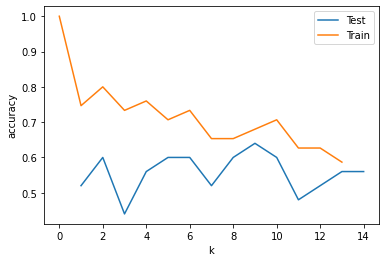

In [119]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df_numData = df_data.apply(le.fit_transform)

# Droping labels column
X = df_numData.drop(['recall result'], axis=1)
y = df_numData['recall result']

# Read test data
df_target_test = pd.read_csv('car_test.csv')

# Drop labels from test target
X_target_test = df_target_test.drop(['recall result'], axis=1)

# Splitting test and train data with random state for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Applying knn classifier
k_range = range(1,15)
scores_test = []
scores_train = []
for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_test.append(knn.score(X_test, y_test))
    scores_train.append(knn.score(X_train, y_train))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range,scores_test)
plt.plot(scores_train)
plt.legend(['Test', 'Train'])

In [120]:
# Taking best fit model (k=9) for predictions and apply for test target prediction
# 1 means Recall and 0 means not recall
knn_best = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
predict_test_target = knn_best.predict(X_target_test)
predict_test_target

array([1])

In [121]:
# Computing confusion matrix on test split
predict_test_split = knn_best.predict(X_test)
confusion = confusion_matrix(y_test, predict_test_split)
print(confusion)

[[9 5]
 [4 7]]


In [122]:
# Calculating precision and recall for knn
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predict_test_split)))
print('Precision: {:.2f}'.format(precision_score(y_test, predict_test_split)))
print('Recall: {:.2f}'.format(recall_score(y_test, predict_test_split)))
print('F1: {:.2f}'.format(f1_score(y_test, predict_test_split)))

Accuracy: 0.64
Precision: 0.58
Recall: 0.64
F1: 0.61


# Applying Decision Trees

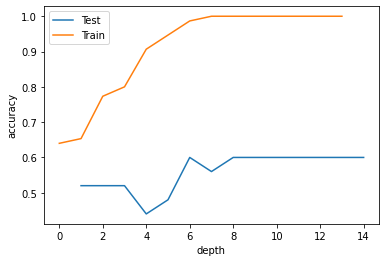

In [123]:
# Decision tree classifer with different max_depths
dt_scores_train = []
dt_scores_test = []

depths = range(1,15)
for d in depths:
    clf = DecisionTreeClassifier(max_depth = d, random_state = 0)
    clf.fit(X_train, y_train)
    dt_scores_test.append(clf.score(X_test, y_test))
    dt_scores_train.append(clf.score(X_train, y_train))

plt.figure()
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.plot(depths, dt_scores_test)
plt.plot(dt_scores_train)
plt.legend(['Test', 'Train'])

In [124]:
# Taking best fit model (depth = 6) for predictions and apply for test target prediction
# 1 means Recall and 0 means not recall
clf_best = DecisionTreeClassifier(max_depth = 6, random_state = 0)
clf_best.fit(X_train, y_train)
dt_predict_test_target = clf_best.predict(X_target_test)
dt_predict_test_target

array([0])

In [125]:
# Computing confusion matrix on test split
dt_predict_test_split = clf_best.predict(X_test)
confusion = confusion_matrix(y_test, dt_predict_test_split)
print(confusion)


[[9 5]
 [5 6]]


In [126]:
# Calculating precision and recall for Decision Trees

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, dt_predict_test_split)))
print('Precision: {:.2f}'.format(precision_score(y_test, dt_predict_test_split)))
print('Recall: {:.2f}'.format(recall_score(y_test, dt_predict_test_split)))
print('F1: {:.2f}'.format(f1_score(y_test, dt_predict_test_split)))

Accuracy: 0.60
Precision: 0.55
Recall: 0.55
F1: 0.55


In [127]:
# Which features are most important for decision trees?

df = pd.DataFrame(X_train.T)
df1 = pd.DataFrame({'feature': df.index.values, 'importance': clf_best.feature_importances_})
df1.sort_values(by=['importance'], ascending=False)

,feature,importance
3,power (hp),0.262532
7,quantity sold,0.241616
1,fuel,0.162520
5,body,0.156306
6,variant,0.082416
4,transmission,0.052561
0,model year,0.042049
2,wheel,0.000000
